In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [289]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_csv('u.data',sep='\t',names=column_names)

In [290]:
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [291]:
title =  pd.read_csv('Movie_Id_Titles')

In [292]:
title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [293]:
data = pd.merge(data,title,on='item_id')

In [294]:
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [295]:
data.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


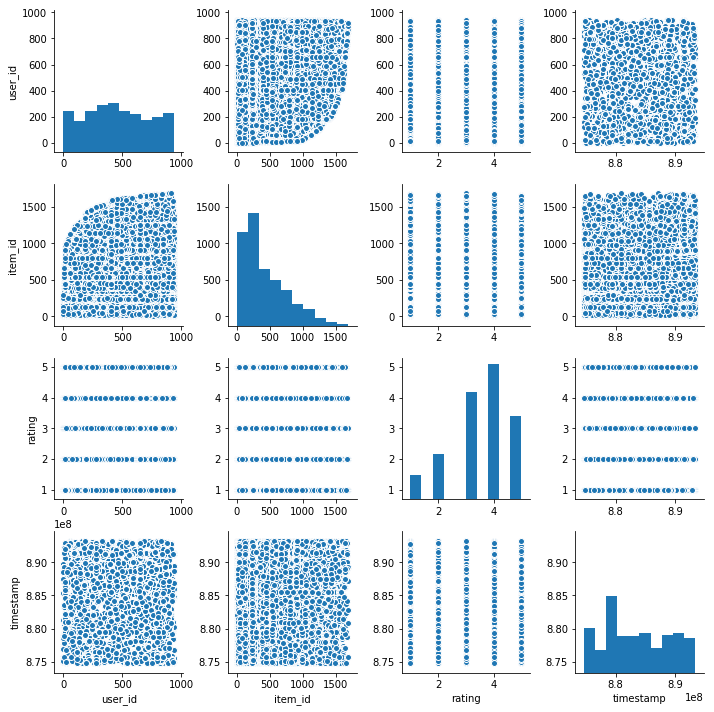

In [260]:
plt.figure(figsize=(12,7))
sns.pairplot(data)

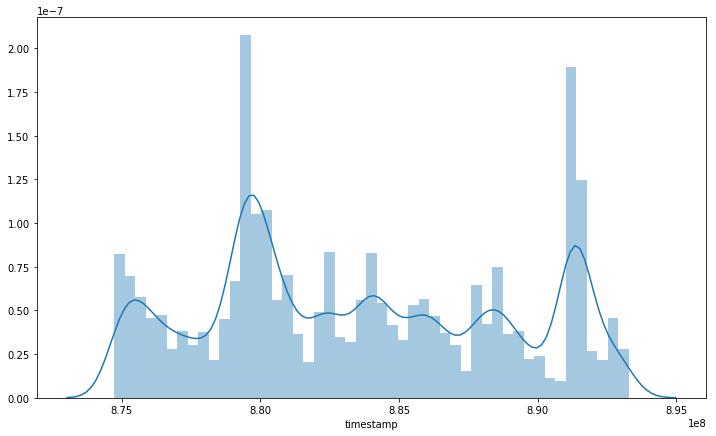

In [261]:
plt.figure(figsize=(12,7))
sns.distplot(data['timestamp'])

In [296]:
data.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [297]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [298]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [299]:
ratings['Num_of_Ratings'] = data.groupby('title')['rating'].count()
ratings.head()

,rating,Num_of_Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


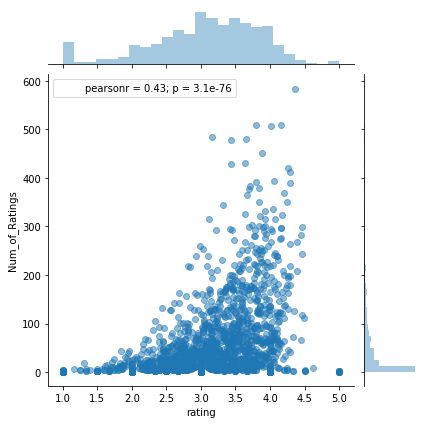

In [300]:
sns.jointplot(x=ratings['rating'],y=ratings['Num_of_Ratings'],alpha=0.5)

In [313]:
Movie_Table = data.pivot_table(values = 'rating',columns ='title',index='user_id')

In [309]:
Movie_Table.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
star_wars = Movie_Table['Star Wars (1977)']
star_wars.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [270]:
corr_sw = Movie_Table.corrwith(star_wars)

E:\Python\Anaconda\lib\site-packages\numpy\lib\function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
E:\Python\Anaconda\lib\site-packages\numpy\lib\function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [271]:
star_wars_ratings = pd.DataFrame(corr_sw,columns=['Correlation'])

In [272]:
star_wars_ratings.dropna(inplace=True)
star_wars_ratings.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [273]:
star_wars_ratings.sort_values(by='Correlation',ascending=False).head()

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


In [274]:
star_wars_ratings = star_wars_ratings.join(ratings['Num_of_Ratings'])

In [275]:
star_wars_ratings.head()

,Correlation,Num_of_Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [276]:
star_wars_ratings[star_wars_ratings['Num_of_Ratings']>100].sort_values(by='Correlation',ascending=False).head()

,Correlation,Num_of_Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


# Test The Recommender System!!

**Run The Cell Below**

In [277]:
e = str(input('enter a movie name in same case letters: '))
a = []
m = []
for i in range(0,len(Movie_Table.columns)-1):
    a.append(Movie_Table.columns[i])

for j in range(0,len(a)-1):
    if bool(e in a[j])==True:
        m = a[j]
        print(m)
    else: None

var_corr = Movie_Table[m]
var_corr_ratings = Movie_Table.corrwith(var_corr)
var_corr_ratings_final = pd.DataFrame(var_corr_ratings,columns=['Correlation'])
var_corr_ratings_final = var_corr_ratings_final.join(ratings['Num_of_Ratings'])
var_corr_ratings_final.dropna(inplace=True)
print('Similar Movies Are: ')
var_corr_ratings_final[var_corr_ratings_final['Num_of_Ratings']>100].sort_values(by='Correlation',ascending=False).head()   

enter a movie name in same case letters: Star Wars
Star Wars (1977)


E:\Python\Anaconda\lib\site-packages\numpy\lib\function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
E:\Python\Anaconda\lib\site-packages\numpy\lib\function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


Similar Movies Are: 


,Correlation,Num_of_Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


# Thank You!!

In [243]:
from factor_analyzer import FactorAnalyzer

In [244]:
fa = FactorAnalyzer()

In [323]:
from sklearn.decomposition import FactorAnalysis as fa

In [324]:
fa.fit(Movie_Table)

TypeError: fit() missing 1 required positional argument: 'X'

In [318]:
Movie_Table.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
